# Exercícios 

Escolha um dataset de sua preferência com as seguintes características: 

- Dado com um atributo rotulado (target)
- Pelo menos 4 variáveis númericas
- Pelo menos 1 variável categórica


1. Crie um pequeno texto de introdução ao seu dado. Explique a origem do dado e o tipo de problema que o entedimento deste pode proporcionar. No seu texto, tente responder as seguintes questões: 


- Qual a origem do meu dado?
- Qual é o problema? 
- Qual é a variável ALVO (target)? 
- Porque eu me importo?
- Quais os ganhos possíveis no entendimento do meu dado? 

2. Crie gráficos para estudar a dispersão numérica das variáveis numéricas (histogramas, boxplot, KDE, etc.)

3. Crie gráficos para estudar a frequencia dos valores possíveis observados nas variáveis categóricas (ex: barplots). 

4. Crie gráficos relacionais entre as variaveis numéricas, mas que explicite a variável ALVO do seu dado. 

5. Use o pandas profiling e gere um relatório automático. 




In [1]:
import pandas as pd

df=pd.read_csv('jobs_in_data.csv')

# convert salary_in_usd to BRL
df['salary_in_brl'] = df['salary_in_usd']*5.5
# criei uma nova coluna com o salário mensal com no maximo 2 casas decimais
df['salary_in_brl_per_month'] = (df['salary_in_brl']/12).round(2)
# drop salary_in_usd, salary
df = df.drop(columns=['salary_in_usd', 'salary', 'salary_currency'])

df.head()

,work_year,job_title,job_category,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_in_brl,salary_in_brl_per_month
0,2023,Data DevOps Engineer,Data Engineering,Germany,Mid-level,Full-time,Hybrid,Germany,L,522566.0,43547.17
1,2023,Data Architect,Data Architecture and Modeling,United States,Senior,Full-time,In-person,United States,M,1023000.0,85250.00
2,2023,Data Architect,Data Architecture and Modeling,United States,Senior,Full-time,In-person,United States,M,449900.0,37491.67
3,2023,Data Scientist,Data Science and Research,United States,Senior,Full-time,In-person,United States,M,1166000.0,97166.67
4,2023,Data Scientist,Data Science and Research,United States,Senior,Full-time,In-person,United States,M,513150.0,42762.50


# 1. Crie um pequeno texto de introdução ao seu dado.

Este dataset foi coletado pelo Kaggle [Jobs and Salaries in Data Science](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data)
e contém informações sobre salários e cargos em ciência de dados. O entendimento deste dataset pode proporcionar uma 
melhor compreensão do mercado de trabalho em ciência de dados, ajudando empresas a entenderem o mercado e a oferecerem
salários mais justos e competitivos. Também pode ajudar a entender a evolução da carreira de ciência de dados e 
analisar os salários entre os cargos e niveis de experiência. Como objetivo, podemos tentar predizer o salário de 
um profissional de ciência de dados baseado em suas características. 


# 2. Crie gráficos para estudar a dispersão numérica das variáveis numéricas (histogramas, boxplot, KDE, etc.)

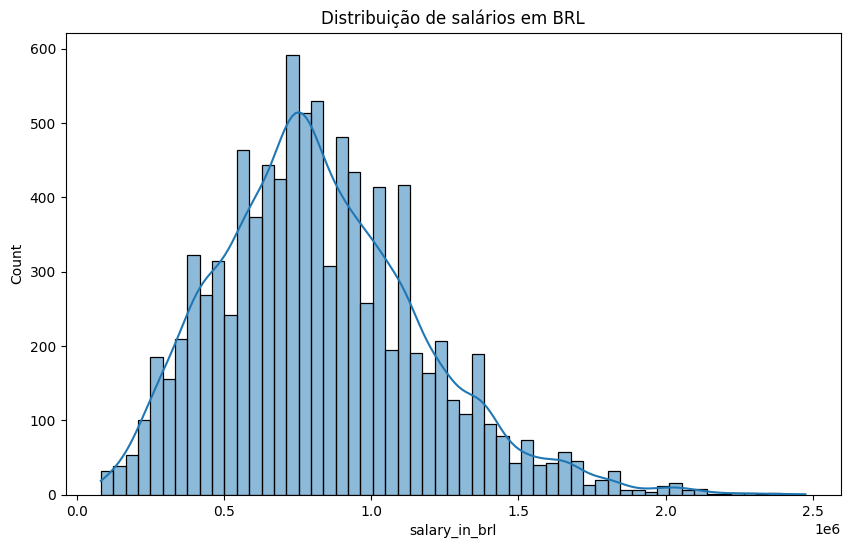

In [2]:
# cria gráfico que mostre a distribuição de salários, mostre os salários no seguinte formado 999.999,99
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_brl'], kde=True)
plt.title('Distribuição de salários em BRL')
plt.show()



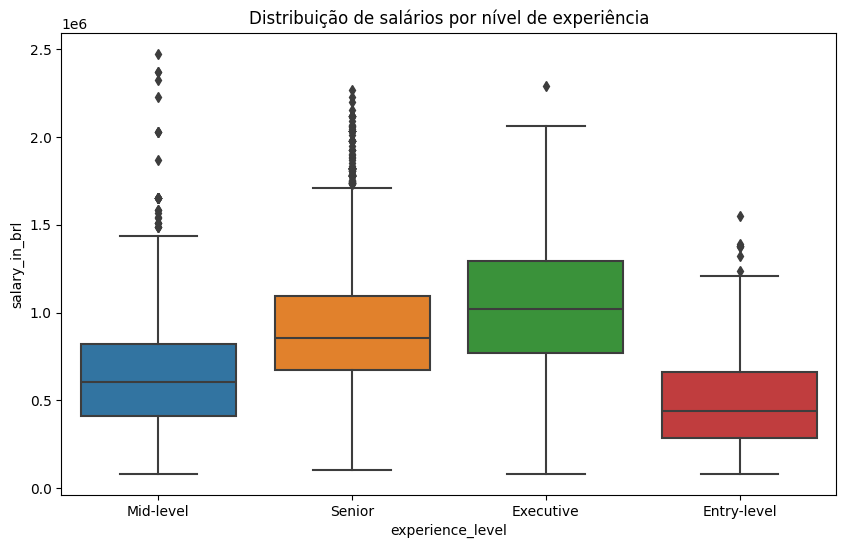

In [3]:

# cria gráfico que mostre a distribuição de salários por nível de experiência
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_brl')
plt.title('Distribuição de salários por nível de experiência')
plt.show()



# 3. Crie gráficos para estudar a frequencia dos valores possíveis observados nas variáveis categóricas (ex: barplots). 

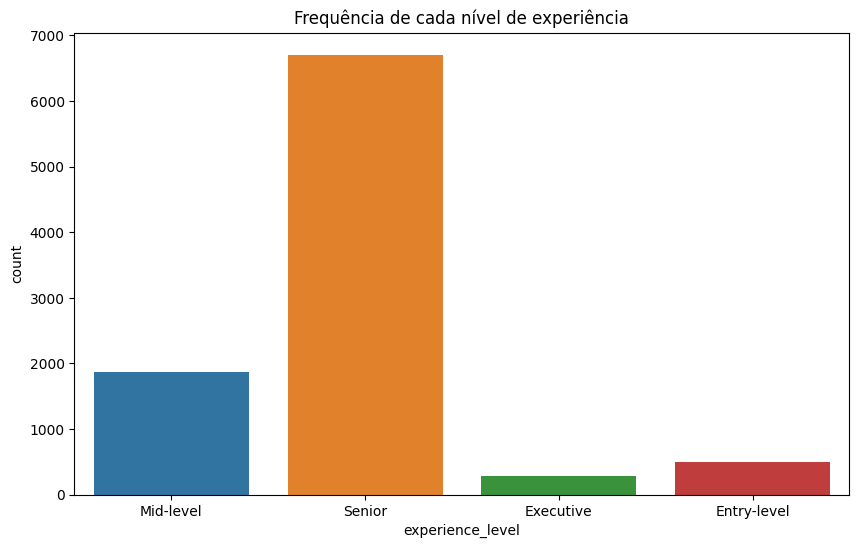

In [4]:
# cria gráfico que mostre a frequência de cada nível de experiência
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='experience_level')
plt.title('Frequência de cada nível de experiência')
plt.show()


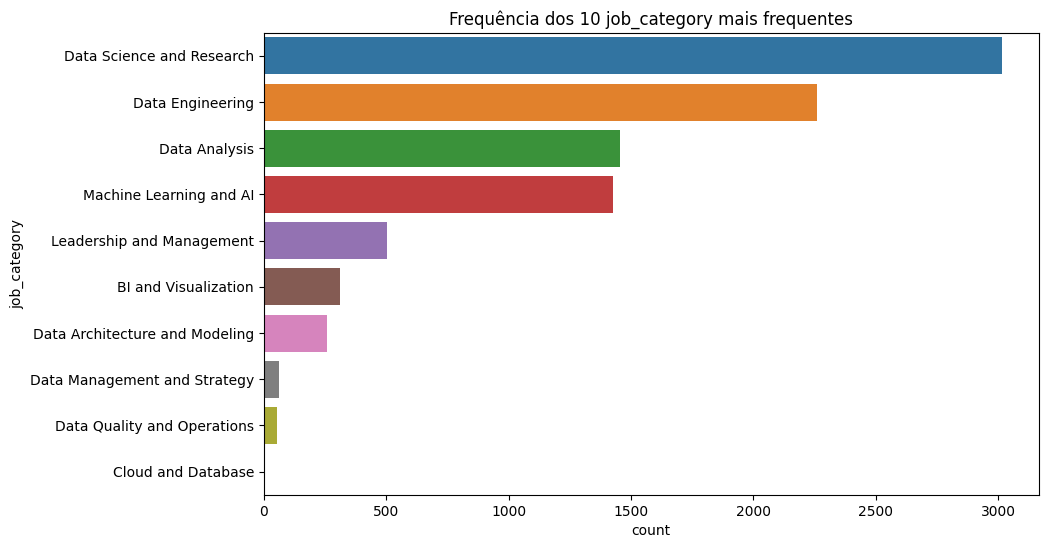

In [5]:
# cria gráfico que mostre a frequência de cada job_category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='job_category', order=df['job_category'].value_counts().head(10).index)
plt.title('Frequência dos 10 job_category mais frequentes')
plt.show()

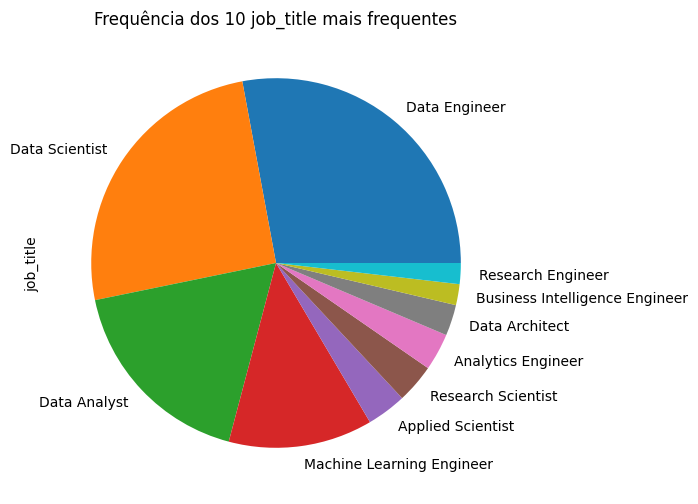

In [6]:
# cria gráfico de pie que mostre a frequência dos 10 job_title mais frequentes
plt.figure(figsize=(10, 6))
df['job_title'].value_counts().head(10).plot.pie()
plt.title('Frequência dos 10 job_title mais frequentes')
plt.show()


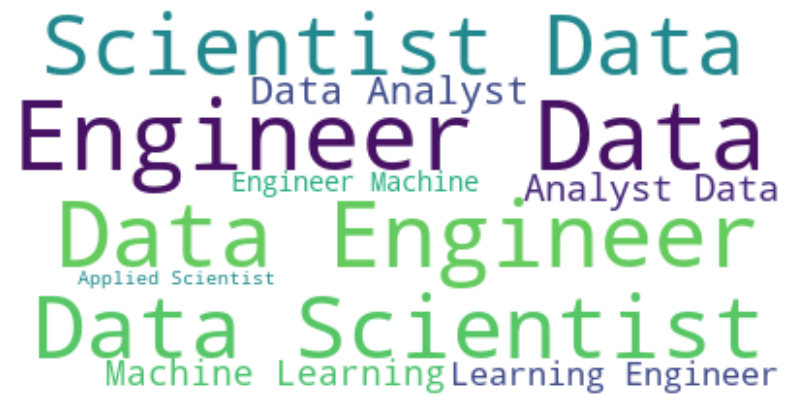

In [7]:
# cria gráfico word cloud que mostre os 10 cargos com os salários mais altos
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(max_font_size=100, max_words=10, background_color="white").generate(' '.join(df['job_title']))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



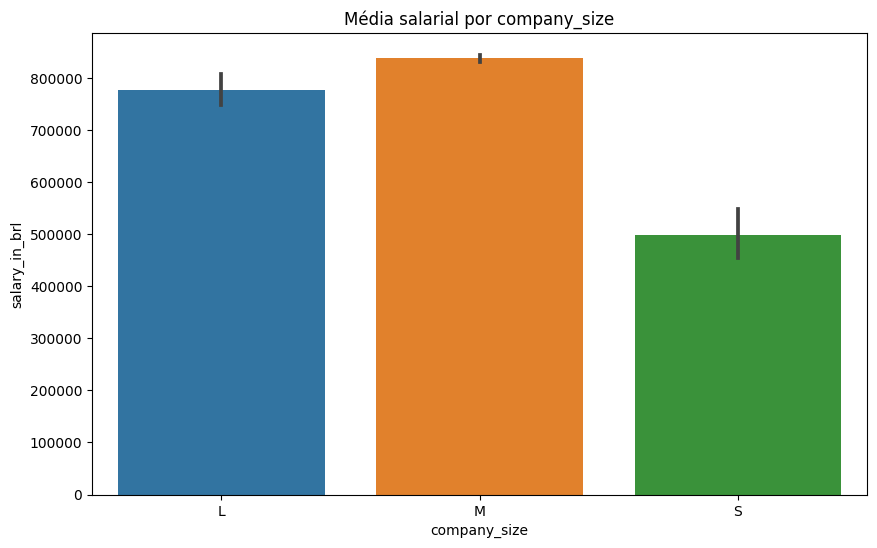

In [8]:
# cria gráfico da média salarial por company_size
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='company_size', y='salary_in_brl')
plt.title('Média salarial por company_size')
plt.show()

# 4. Crie gráficos relacionais entre as variaveis numéricas, mas que explicite a variável ALVO do seu dado.

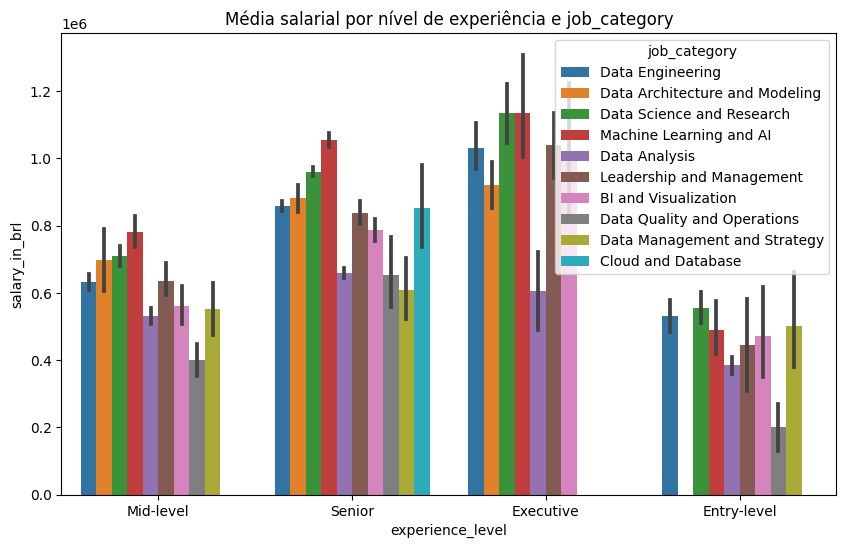

In [9]:
# criar um gráfico grouped barplot que mostre a média salarial por nível de experiência e job_category
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='experience_level', y='salary_in_brl', hue='job_category')
plt.title('Média salarial por nível de experiência e job_category')
plt.show()


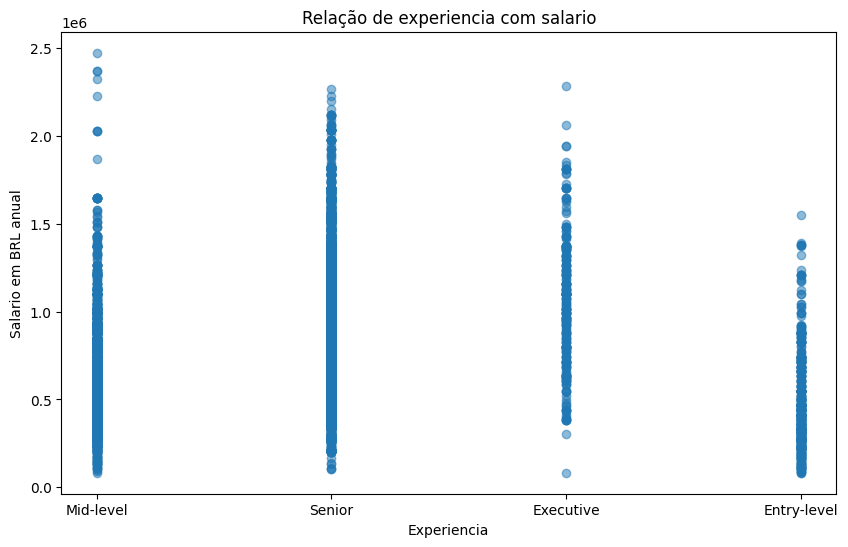

In [15]:
# cria grafico que mostra a relação de experiencia com salario mostrando o salario em BRL formatado
plt.figure(figsize=(10, 6))
plt.scatter(
    df['experience_level'],
    df['salary_in_brl'],
    alpha=0.5
)
plt.title('Relação de experiencia com salario')
plt.xlabel('Experiencia')
plt.ylabel('Salario em BRL anual')
plt.show()

# 5. Use o pandas profiling e gere um relatório automático. 

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")

profile.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]